Cryptocurrency

In [76]:
from sklearn.manifold import TSNE
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [77]:
# Loading the preprocessed iris dataset
file_path = Path("Resources/crypto_data.csv")
import os
print (os.getcwd())

def Fix_TotalCoinSupply(value):
    try:
        return float(value.replace(" ", ""))
    except: # of we get am exception
        return None
crypto_df = pd.read_csv(file_path,index_col=0,converters = {'TotalCoinSupply':Fix_TotalCoinSupply})

crypto_df.head()

C:\GitHub2\Unsupervised-Machine-Learning-Cryptocurrency-Clusters


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,4.200000e+01
365,365Coin,X11,True,PoW/PoS,NaN,2.300000e+09
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,5.320000e+08
611,SixEleven,SHA-256,True,PoW,NaN,6.110000e+05
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0.000000e+00


In [78]:
crypto_df.shape

(1252, 6)

In [79]:
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 42 to PUNK
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         1252 non-null   object 
 1   Algorithm        1252 non-null   object 
 2   IsTrading        1252 non-null   bool   
 3   ProofType        1252 non-null   object 
 4   TotalCoinsMined  744 non-null    float64
 5   TotalCoinSupply  1250 non-null   float64
dtypes: bool(1), float64(2), object(3)
memory usage: 59.9+ KB


In [80]:
#Discard all cryptocurrencies that are not being traded. 
#Filter for currencies that are currently being traded
crypto_df = crypto_df[crypto_df.IsTrading == True] 
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,4.200000e+01
365,365Coin,X11,True,PoW/PoS,NaN,2.300000e+09
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,5.320000e+08
611,SixEleven,SHA-256,True,PoW,NaN,6.110000e+05
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0.000000e+00


In [81]:
#drop the IsTrading column from the dataframe.
cleaned_df = crypto_df.drop(columns=["IsTrading"])
cleaned_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
365,365Coin,X11,PoW/PoS,NaN,2.300000e+09
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
611,SixEleven,SHA-256,PoW,NaN,6.110000e+05
808,808,SHA-256,PoW/PoS,0.000000e+00,0.000000e+00


In [82]:
# check null values
cleaned_df.isnull().sum()

CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      2
dtype: int64

In [83]:
#Remove all rows that have at least one null value
#click between parenthesis, then shift/tab.
cleaned_df = cleaned_df.dropna()
cleaned_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
808,808,SHA-256,PoW/PoS,0.000000e+00,0.000000e+00
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,3.141593e+11
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,2.100000e+07


In [84]:
#data frame to hold coinname
#unname
coinname_df = pd.DataFrame(cleaned_df["CoinName"],index=cleaned_df.index) 
coinname_df

,CoinName
42,42 Coin
404,404Coin
808,808
1337,EliteCoin
BTC,Bitcoin
...,...
ZEPH,ZEPHYR
GAP,Gapcoin
BDX,Beldex
ZEN,Horizen


In [85]:
#Filter for cryptocurrencies that have been mined. 
#That is, the total coins mined should be greater than zero.
cleaned_df = cleaned_df[cleaned_df.TotalCoinsMined > 0] 
cleaned_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,3.141593e+11
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,2.100000e+07
ETH,Ethereum,Ethash,PoW,1.076842e+08,0.000000e+00


In [86]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         532 non-null    object 
 1   Algorithm        532 non-null    object 
 2   ProofType        532 non-null    object 
 3   TotalCoinsMined  532 non-null    float64
 4   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(3)
memory usage: 24.9+ KB


In [87]:
cleaned_df = cleaned_df.drop(columns=["CoinName"])

In [88]:
#In order for your dataset to be comprehensible to a machine learning algorithm, 
#its data should be numeric
#get_dummies to convert categorical to numeric

# TotalcoinSupply has one non-numeric value cause data type to a string
# not a number
# get more column, one column for each categorical value
# train the model to these features
# muntz

cleaned_df = pd.get_dummies(cleaned_df,columns=["Algorithm","ProofType"])
cleaned_df




,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
cleaned_df = StandardScaler().fit_transform(cleaned_df)
cleaned_df
 

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [90]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = PCA(n_components=.99)

# Get two principal components.
cleaned_df = pca.fit_transform(cleaned_df)
cleaned_df

array([[-0.33509881,  1.03218907, -0.59071344, ...,  0.13391619,
        -0.11593793,  0.00934363],
       [-0.31843395,  1.03233143, -0.59112555, ...,  0.13399077,
        -0.11564619,  0.00918792],
       [ 2.30546811,  1.65638302, -0.68361667, ..., -0.07341934,
         0.17914389, -1.41905933],
       ...,
       [ 0.32434854, -2.31230764,  0.42151537, ...,  0.23019201,
        -0.01101053,  0.47286829],
       [-0.14936365, -2.04933553,  0.41296826, ...,  0.35568904,
         0.08258903, -0.07056385],
       [-0.2899575 ,  0.82119451, -0.27632685, ...,  1.03190166,
        -0.05476628, -0.9014263 ]])

In [91]:
cleaned_df.shape

(532, 86)

In [92]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [95]:
# Reduce dimensions
tsne_features = tsne.fit_transform(cleaned_df)
# The dataset has 2 columns
tsne_features.shape

C:\Users\y2\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(532, 2)

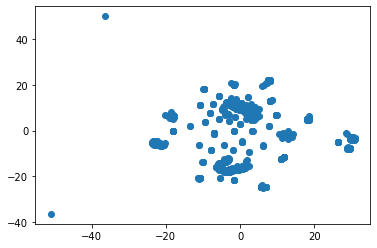

In [97]:
# Visualize the clusters
plt.scatter(tsne_features[:,0],  tsne_features[:,1])
plt.show()

In [ ]:
#lots of crysto currency appear at group 20, 0 and -20, 0

In [98]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()



C:\Users\y2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,177945.046875
1,2,109056.343750
2,3,62629.082031
3,4,37629.718750
4,5,30205.111328


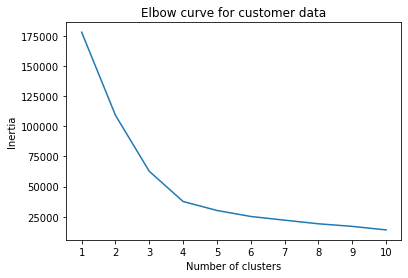

In [99]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()